In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px
import warnings

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans


warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [5]:
df = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv', sep='\t')

In [ ]:
df.dtypes

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [9]:
df.shape

(2240, 29)

In [10]:
# Display summary statistics for a dataframe
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
#convert date to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
#let's check the datatype
df['Dt_Customer']

In [13]:
# define numerical & categorical columns
#Let's drop the ID column

columns = [column for column in df.columns if column != "ID"]

numeric_features = [feature for feature in columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 26 numerical features : ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

We have 2 categorical features : ['Education', 'Marital_Status']


In [14]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [15]:
df[categorical_features[0]].value_counts().count()

np.int64(5)

In [16]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Education
Graduation    50.312500
PhD           21.696429
Master        16.517857
2n Cycle       9.062500
Basic          2.410714
Name: proportion, dtype: float64
---------------------------
Marital_Status
Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
Absurd       0.089286
YOLO         0.089286
Name: proportion, dtype: float64
---------------------------


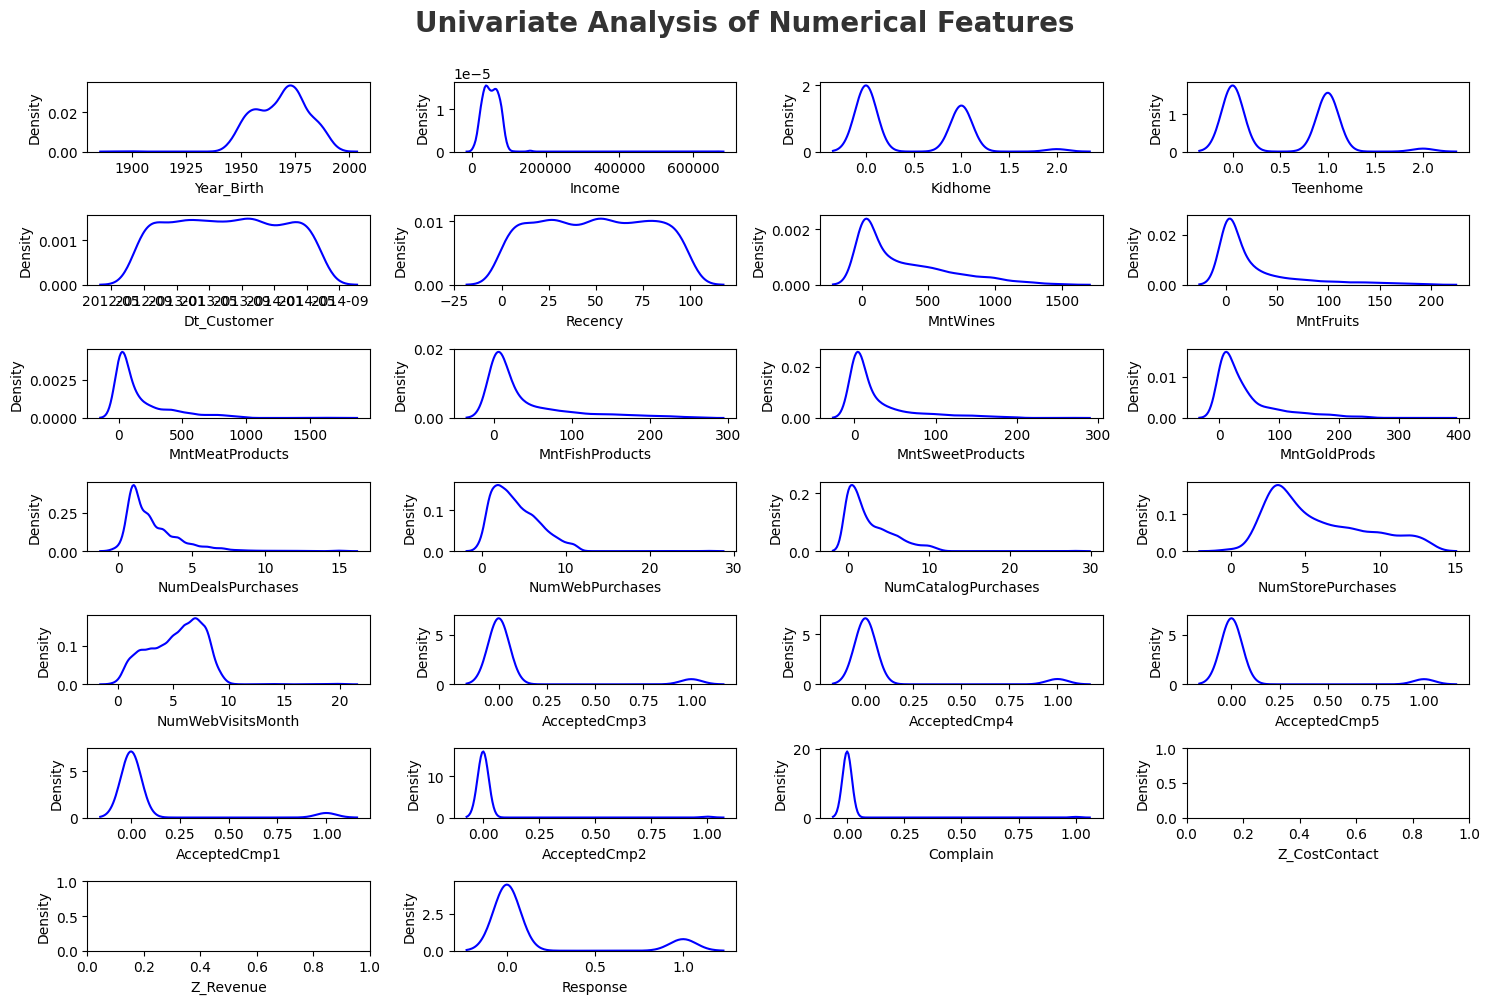

In [17]:
import seaborn as sns
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(7, 4, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# save plot
# plt.savefig('./images/Univariate_Num.png')

Z_CostContact and Z_Revenue columns are not showing any graph. I'll graph those seperately and check what is happening.

<Axes: >

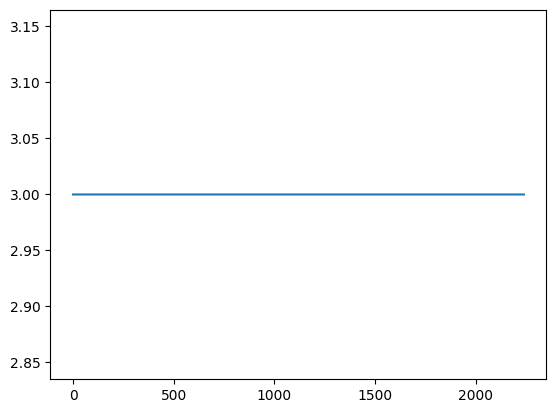

In [18]:
df.Z_CostContact.plot()

<Axes: >

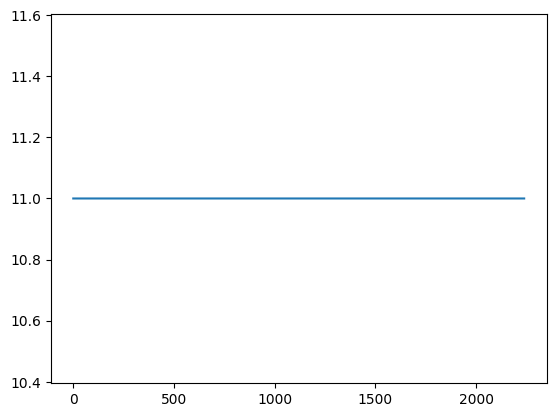

In [19]:
df.Z_Revenue.plot()

The column Z_CostContact, Z_Revenue have constant values. As this columns does not have any varience, I can drop this column

In [20]:
df = df.drop(columns=['Z_CostContact','Z_Revenue'])
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

### Categorical Features

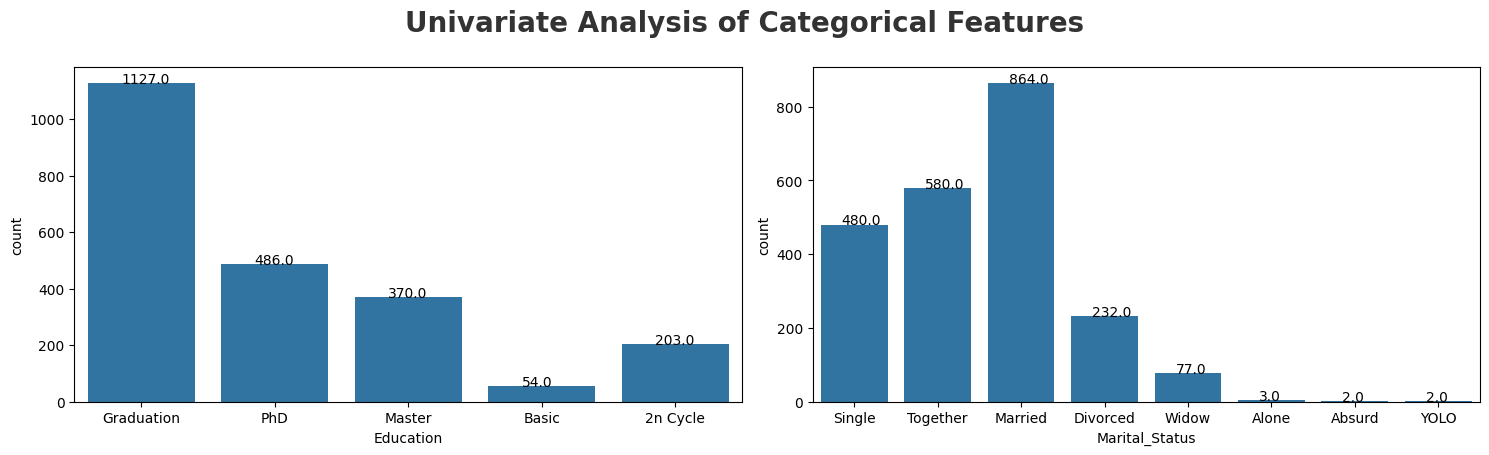

In [21]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(x=df[categorical_features[i]])
    if df[categorical_features[i]].value_counts().count() <10:
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

# save plot
# plt.savefig('./images/Univariate_Cat.png')

Report

For column Education

Most of the Customers are falling into Graduation category.

Respectively, PhD, Master, Basic and *2n Cycle are also present.


For column Maritial_Status

For about 864 customers are married.
Together, single, divorced, widow are noticeable where Alone, Absurd and YOLO categories are very less.

Count of features based on years

<Axes: xlabel='YEAR', ylabel='CUSTOMER_JOINED'>

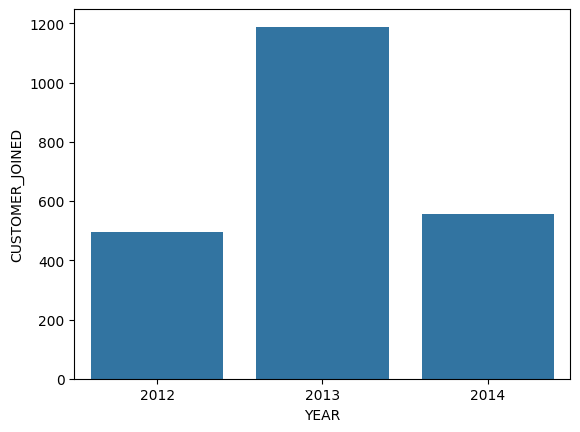

In [22]:
df1 = df.copy()
df1["Year"] = df1.Dt_Customer.dt.year
customer_joined_per_year = df1.groupby(by="Year", axis=0)[['ID']].count()
customer_joined_per_year = customer_joined_per_year.reset_index()
customer_joined_per_year.columns = ['YEAR','CUSTOMER_JOINED']
sns.barplot(data = customer_joined_per_year, x = customer_joined_per_year['YEAR'], y = customer_joined_per_year['CUSTOMER_JOINED'])

Report

By this report, we can say that, most number of customers have joined in the year 2013
The number of customers got increased in year 2013 but in the year 2014, the number of customers got decreased.

###Multivariate Analysis

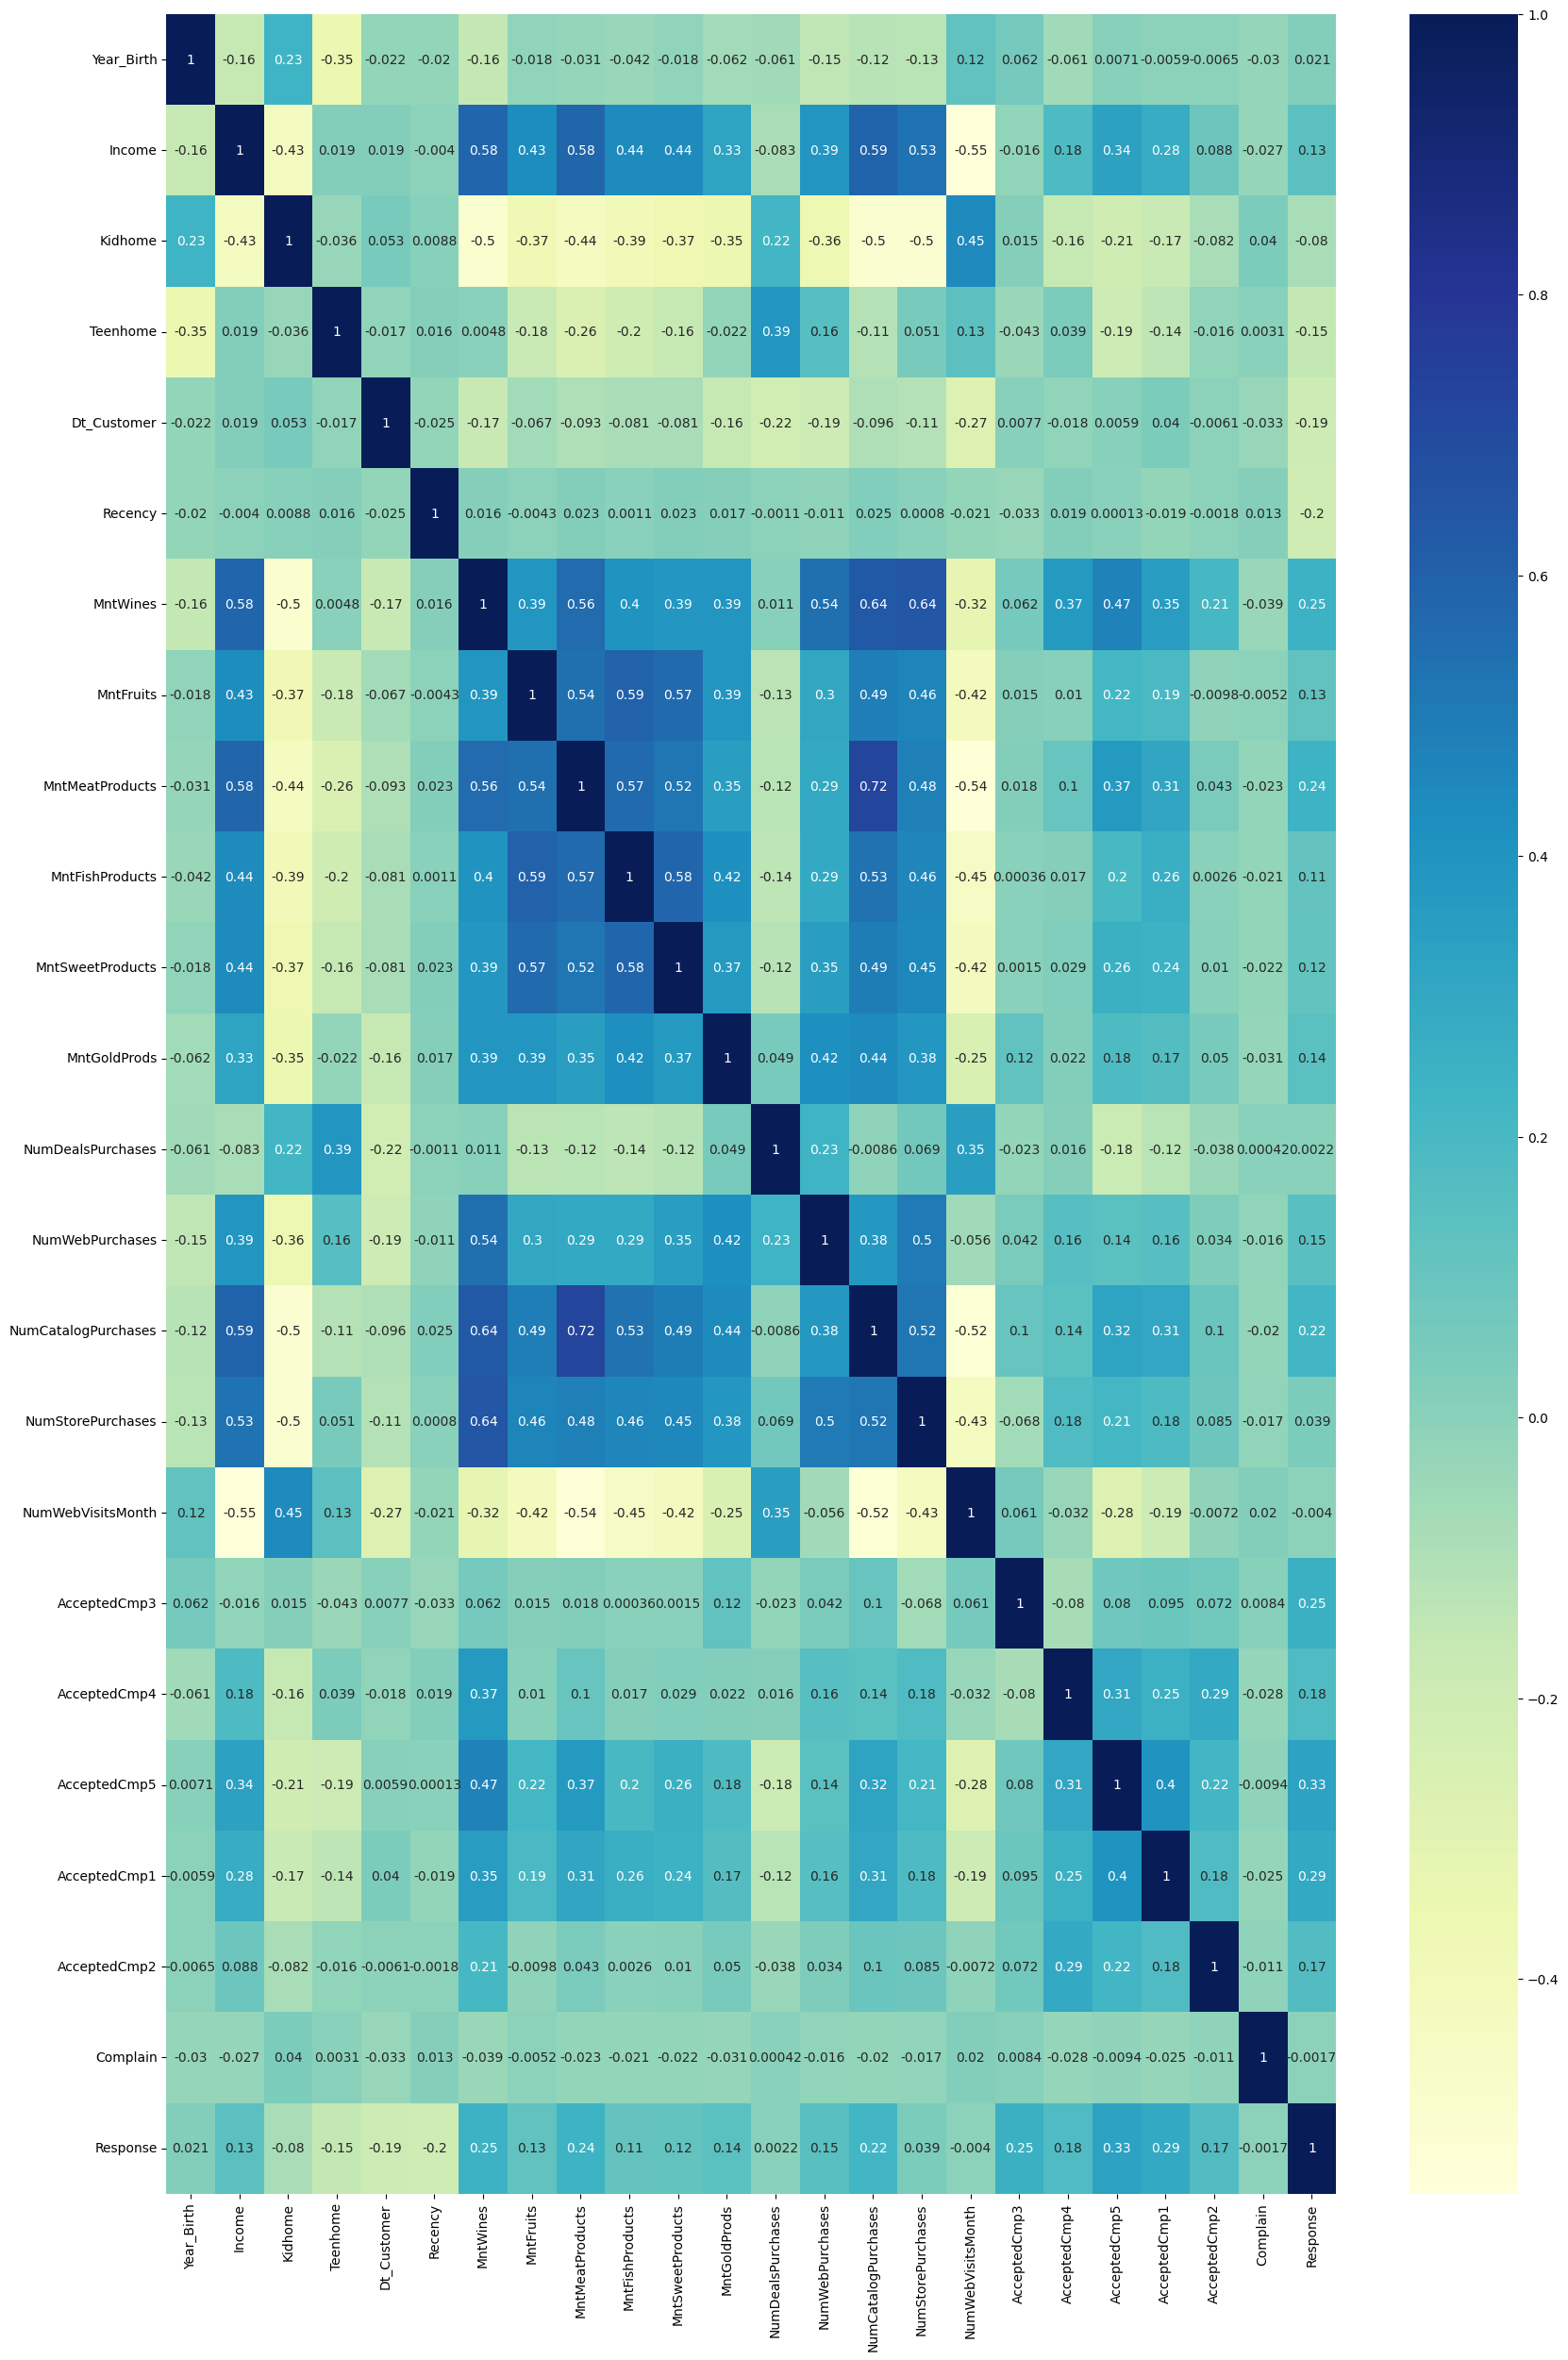

In [23]:
#Check Multicollinearity in Numerical features
plt.figure(figsize = (20,30))
num_features = numeric_features.copy()
num_features.remove('Z_CostContact')
num_features.remove('Z_Revenue')

sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu")
plt.show()


I check the correlation in **vif** now

income has some null values. I first input those values

In [24]:
#I fill the income column with median income
df.Income.fillna(df.Income.median(), inplace=True)

In [25]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Feature Extraction
The following code creates features that would be helpful to describe the profile of the customer

In [26]:

from datetime import datetime

raw_df = df.copy() #saving the raw dataframe for reference


##  creating a new field to store the Age of the customer
df['Age']=2022-df['Year_Birth']

###  recoding the customer's education level to numeric form (0: high-school, 1: diploma, 2: bachelors, 3: masters, and 4: doctorates)
df["Education"].replace({"Basic":0,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":4},inplace=True)

#  recoding the customer's marital status to numeric form (0: not living with a partner, 1: living with a partner)
df['Marital_Status'].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,"Alone":0},inplace=True)

#  creating a new field to store the number of children in the household
df['Children']=df['Kidhome']+df['Teenhome']

#creating Family_Size
df['Family_Size']=df['Marital_Status']+df['Children']+1



#  creating a new field to store the total spending of the customer
df['Total_Spending']=df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Total Promo"] =  df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

## The following code works out how long the customer has been with the company and store the total number of promotions the customers responded to
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
today=datetime.today()
df['Days_as_Customer']=(today-df['Dt_Customer']).dt.days
df['Offers_Responded_To']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df["Parental Status"] = np.where(df["Children"] > 0, 1, 0)






#dropping columns which are already used to create new features
columns_to_drop = ['Year_Birth','Kidhome','Teenhome']
df.drop(columns = columns_to_drop, axis = 1, inplace=True)
df.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits",
                   "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog",
                   "NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"},
          inplace = True)

df = df[["Age","Education","Marital Status","Parental Status","Children","Income","Total_Spending","Days_as_Customer","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total Promo","NumWebVisitsMonth"]]


In [27]:
columns = [column for column in df.columns if column != "ID"]

numeric_features = [feature for feature in columns if df[feature].dtype != 'O']

continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Names of continues features :',continuous_features)

Names of continues features : ['Age', 'Income', 'Total_Spending', 'Days_as_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'NumWebVisitsMonth']


Multicollinearity Check
Variance Inflation Factor (VIF)
Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features, df):

    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif


#we will remove the datetime column which is not required for the vif checking
cont_features = continuous_features.copy()

# we will not chech vif for total spending, as it is the summation of Wines,Fruits,Meat,Fish,Sweets,Gold.
cont_features.remove('Total_Spending')
compute_vif(cont_features, df)
# other_columns

,Variable,VIF
0,Age,1.075265
1,Income,2.125893
2,Days_as_Customer,1.275059
3,Recency,1.004938
4,Wines,2.642362
5,Fruits,1.933450
6,Meat,2.757364
7,Fish,2.068554
8,Sweets,1.898322
9,Gold,1.484205


As we can see the Vif for the columns are less than 5, we can safely assume that the data has not such correlations.

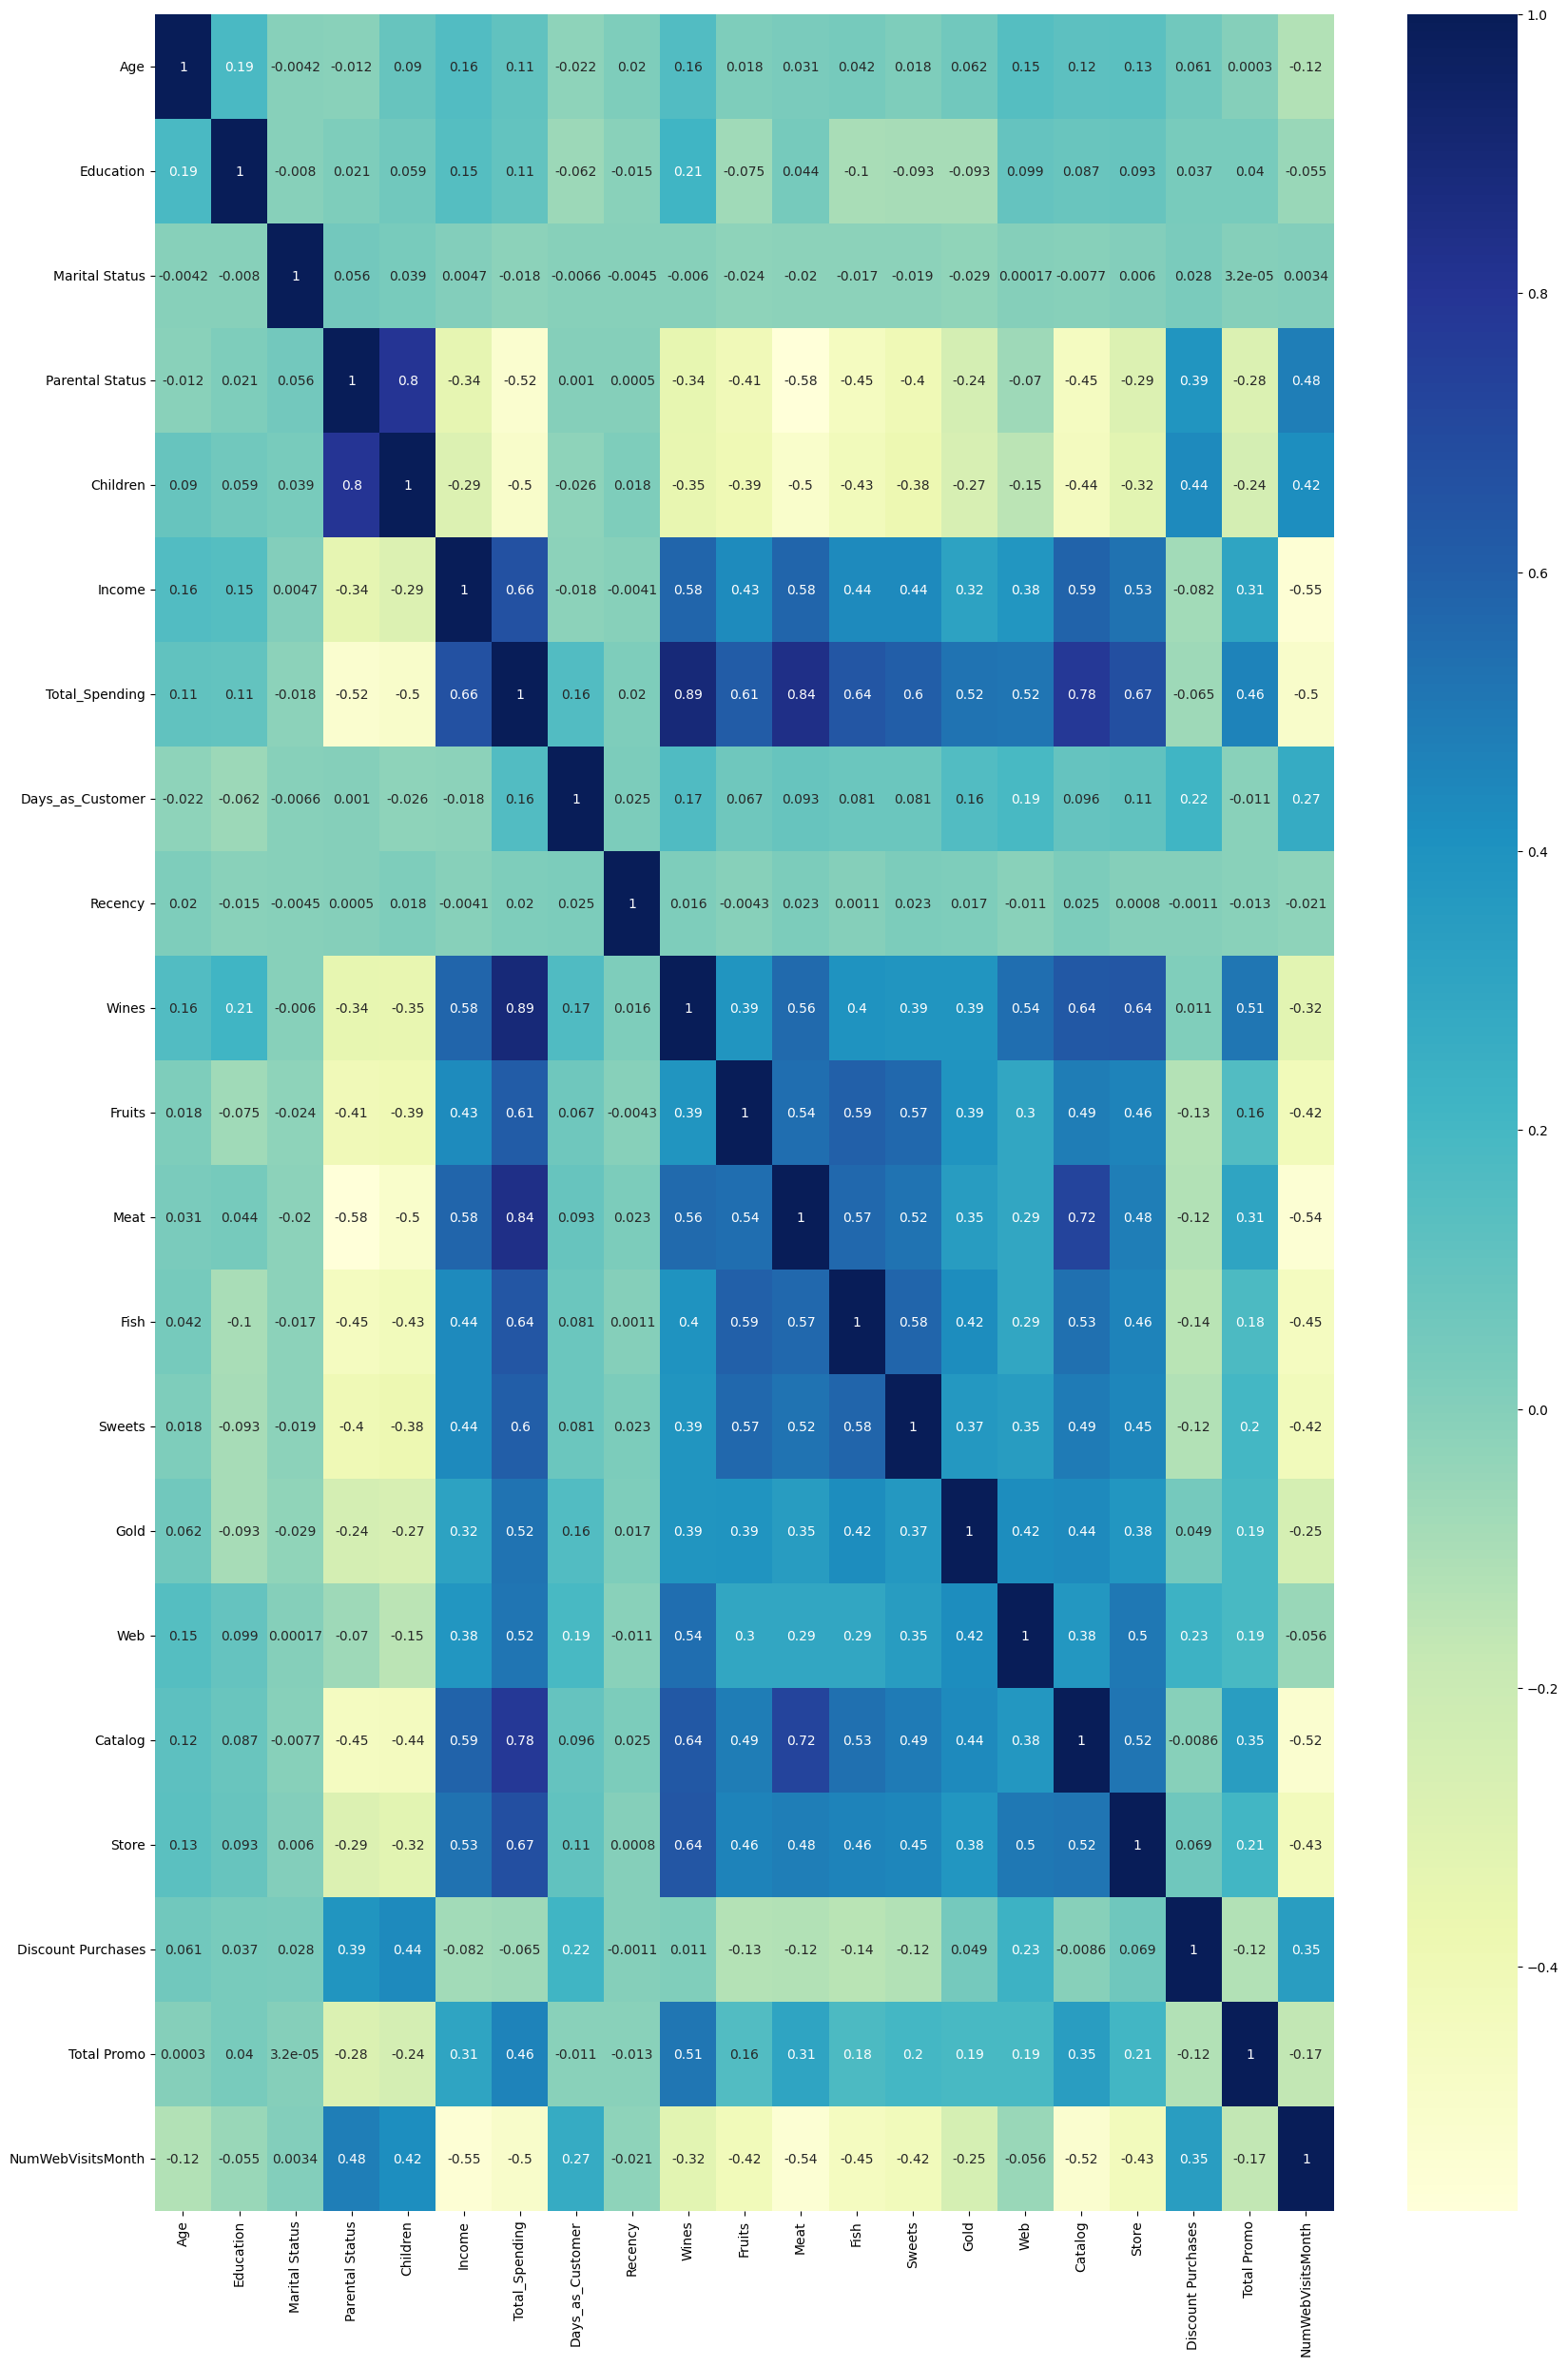

In [29]:
plt.figure(figsize = (20,30))
num_features = numeric_features.copy()

sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu")
plt.show()

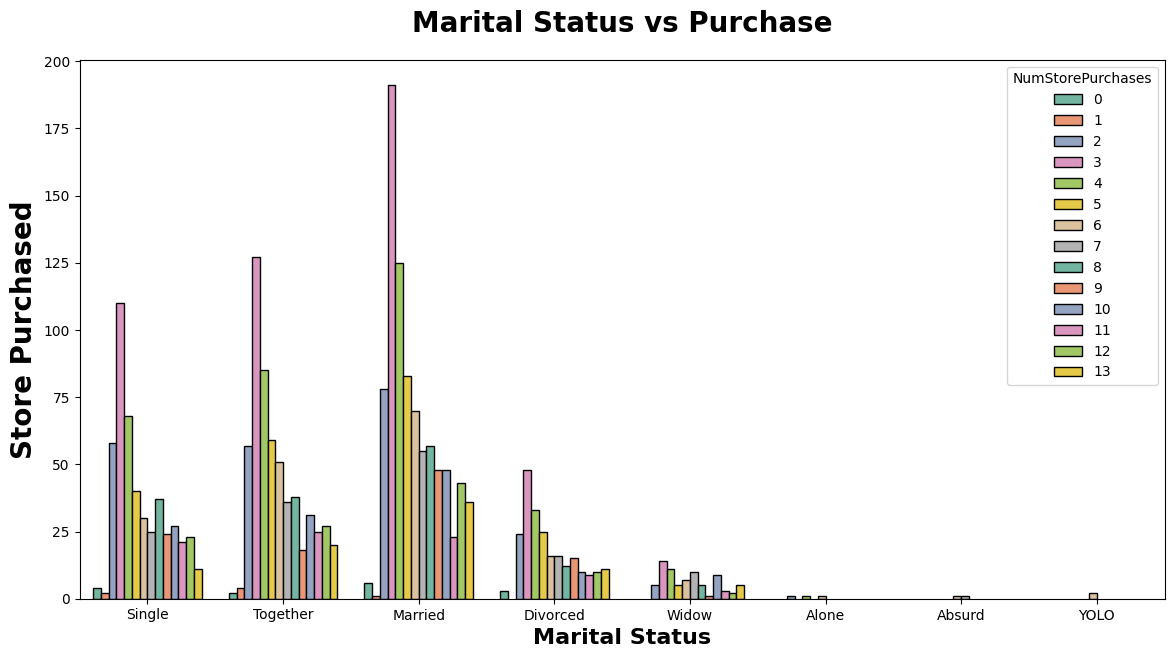

In [30]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Marital_Status",hue="NumStorePurchases", data=df1,ec = "black",palette="Set2")
plt.title("Marital Status vs Purchase", weight="bold",fontsize=20, pad=20)
plt.ylabel("Store Purchased", weight="bold", fontsize=20)
plt.xlabel("Marital Status", weight="bold", fontsize=16)
plt.show()

Report:

As per the Chart, Married Customers bought more store products.
Divorces, Widow, Alone, Absurd and YOLO category people baught very less.

Male and Female customers who are Single has Purchased more than Divorced and Married more than UnMarried.

In [31]:
dates = []
for i in raw_df["Dt_Customer"]:
    i = i.date()
    dates.append(i)

print(f"Newest customer's enrolment date is {max(dates)}")
print(f"Oldest customer's enrolment date is {min(dates)}")

Newest customer's enrolment date is 2014-06-29
Oldest customer's enrolment date is 2012-07-30


Report

The dataset contains customer data from 2012-07-30 to 2014-06-29

In [32]:
df.head()

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,65,2,0,0,0,58138.0,1617,4898,58,635,88,546,172,88,88,8,10,4,3,0,7
1,68,2,0,1,2,46344.0,27,4348,38,11,1,6,2,1,6,1,1,2,2,0,5
2,57,2,1,0,0,71613.0,776,4547,26,426,49,127,111,21,42,8,2,10,1,0,4
3,38,2,1,1,1,26646.0,53,4374,26,11,4,20,10,3,5,2,0,4,2,0,6
4,41,4,1,1,1,58293.0,422,4396,94,173,43,118,46,27,15,5,3,6,5,0,5


In [33]:
#setting plotting options

sns.set_style("white")
sns.set(rc={"axes.facecolor":"#cce0ff","figure.facecolor":"#cce0ff"})
sns.set_context("poster",font_scale = .7)

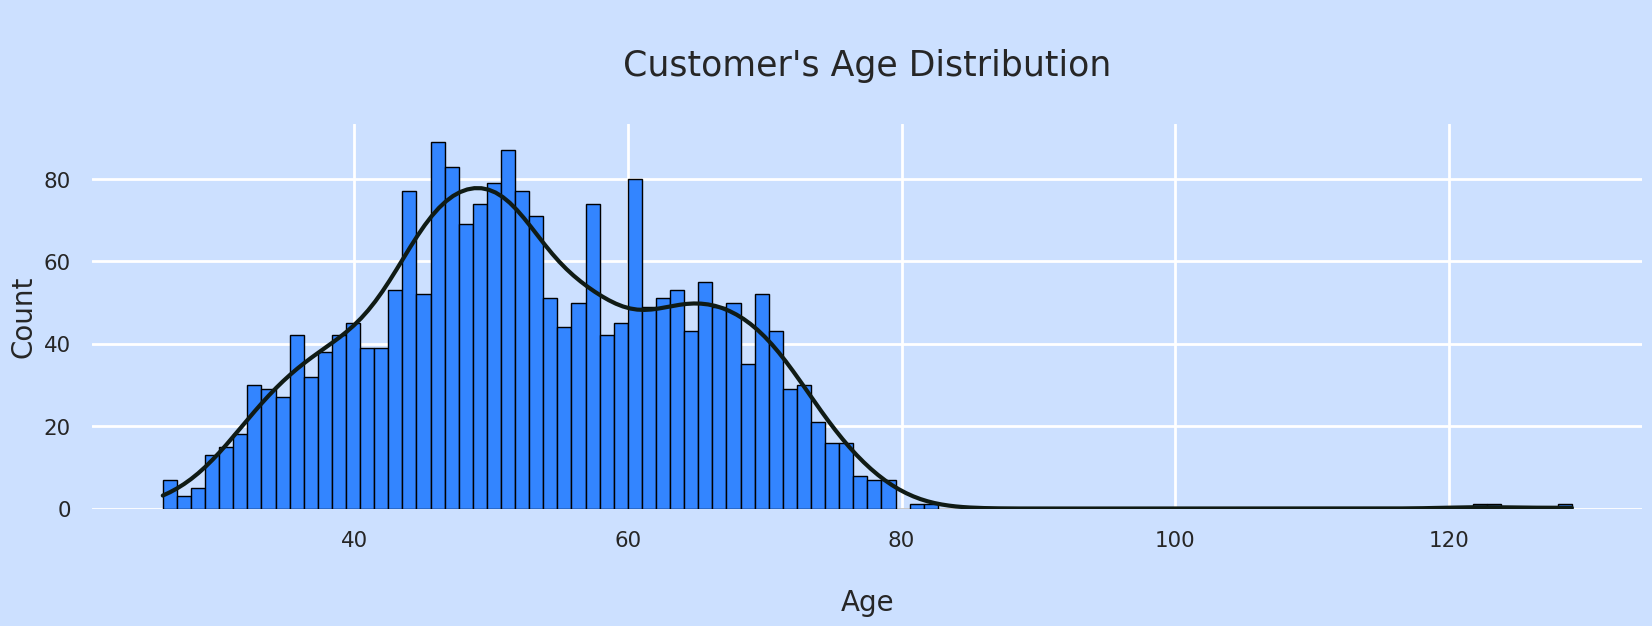

In [34]:

plt.subplots(figsize=(20, 5))
plt.title("Let's have a look on the distribution of customer's age :", weight="bold",fontsize=20, pad=20)

p = sns.histplot(df["Age"],color="#3385ff",kde=True,bins=100,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAge",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

reports:

We can see it's a normal distribution of customer's age.
We can see there's some outliers in the distribution. So we can remove the outliers from the Age column.
As we can see most of the customers' age is 80 or less. So we can filter the data by age <90

Customer's Age Distribution

Let's have a look again on the distribution of customer's age :


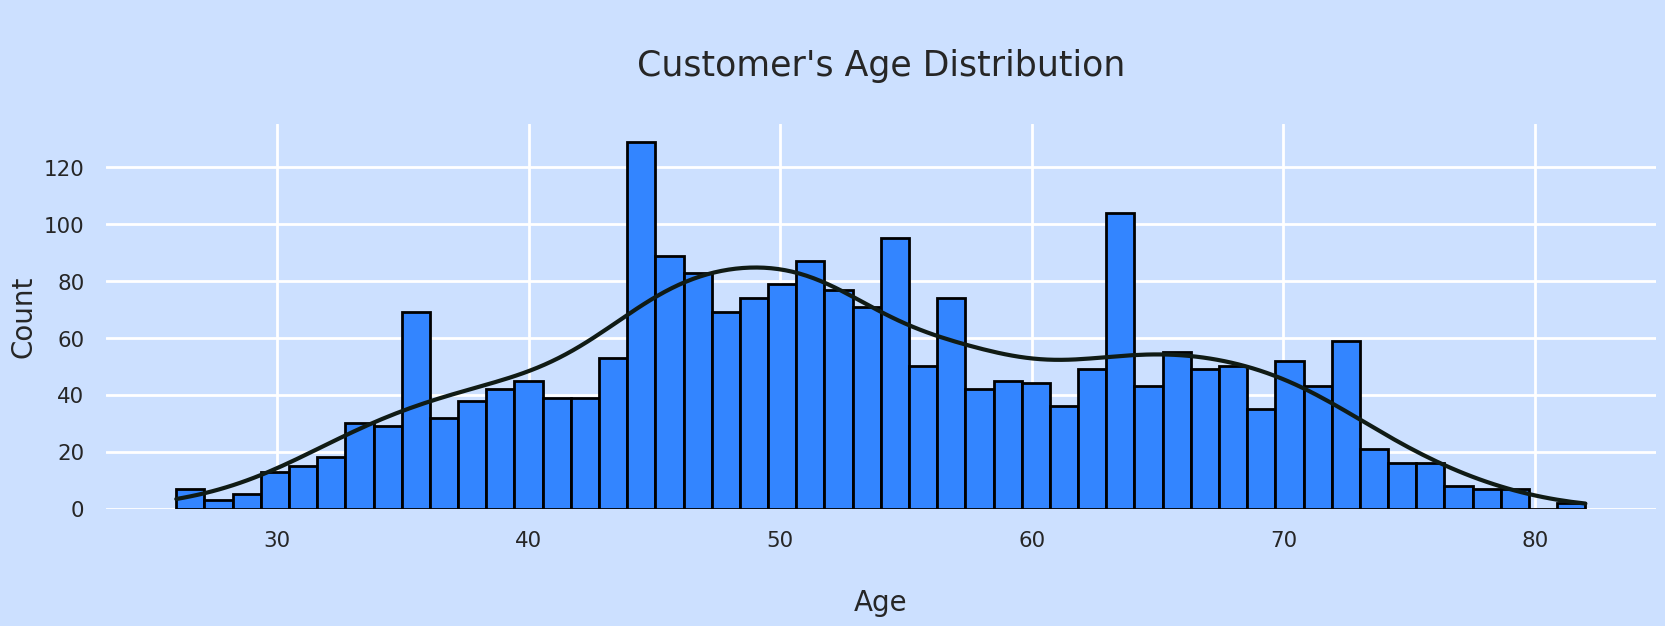

In [35]:
df = df[df["Age"] < 90]

#let's plot now
print(f"Let's have a look again on the distribution of customer's age :")

plt.subplots(figsize=(20, 5))
p = sns.histplot(df["Age"],color="#3385ff",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAge",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()


report

We can see it's a normal distribution of customer's age.

Most of the customers are from 43 to 57.

Customer's Income-Spending Distribution

Let's have a look on the distribution of customer's income and spending :


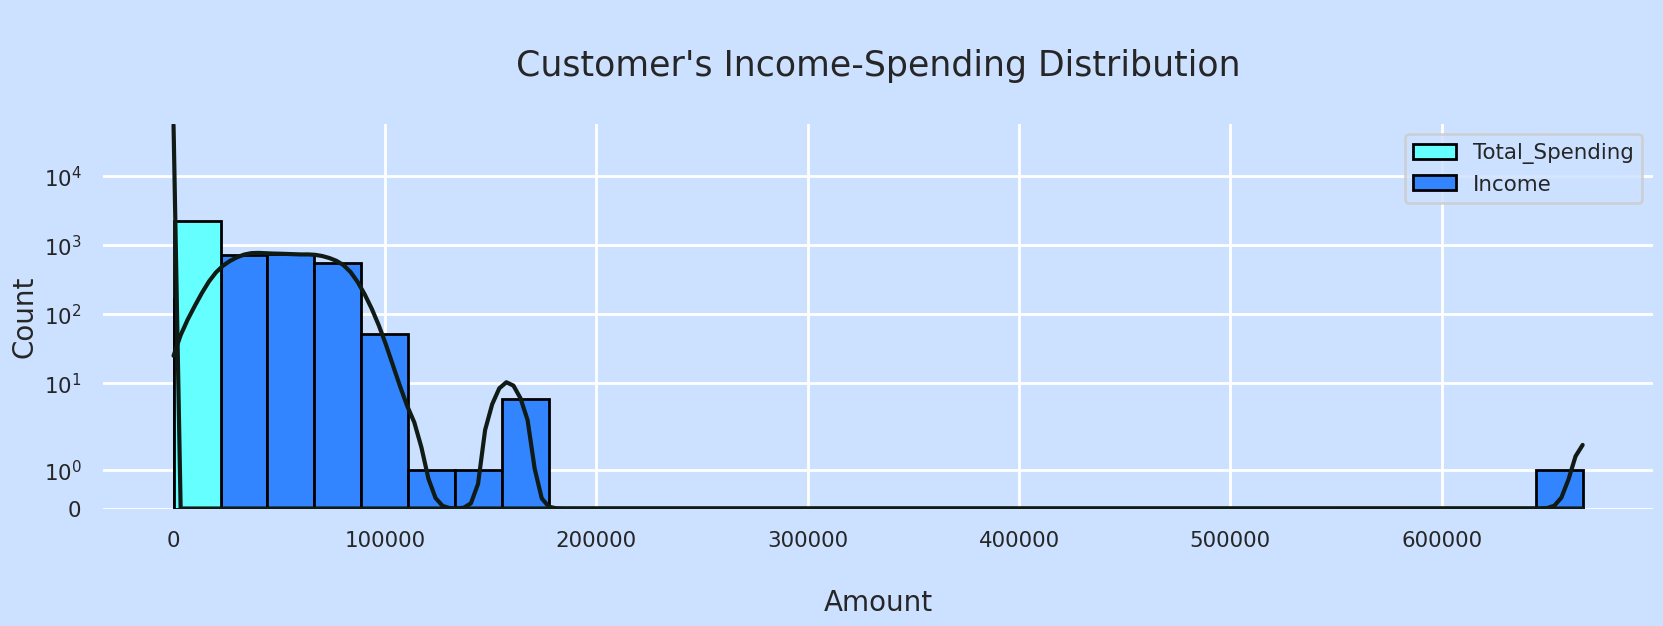

In [36]:
print(f"Let's have a look on the distribution of customer's income and spending :")
plt.subplots(figsize=(20, 5))
p = sns.histplot(df[["Total_Spending","Income"]],palette=["#66ffff","#3385ff"],kde=True,bins=30,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.lines[1].set_color("#101B15")
p.axes.set_yscale("symlog")
p.axes.set_title("\nCustomer's Income-Spending Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAmount",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

reports

Income Column Does have some outliers which are seen after 60,00,00, so we can filter them out

Customer's Income-Spending Distribution

Let's have a look again on the distribution of customer's income and spending :


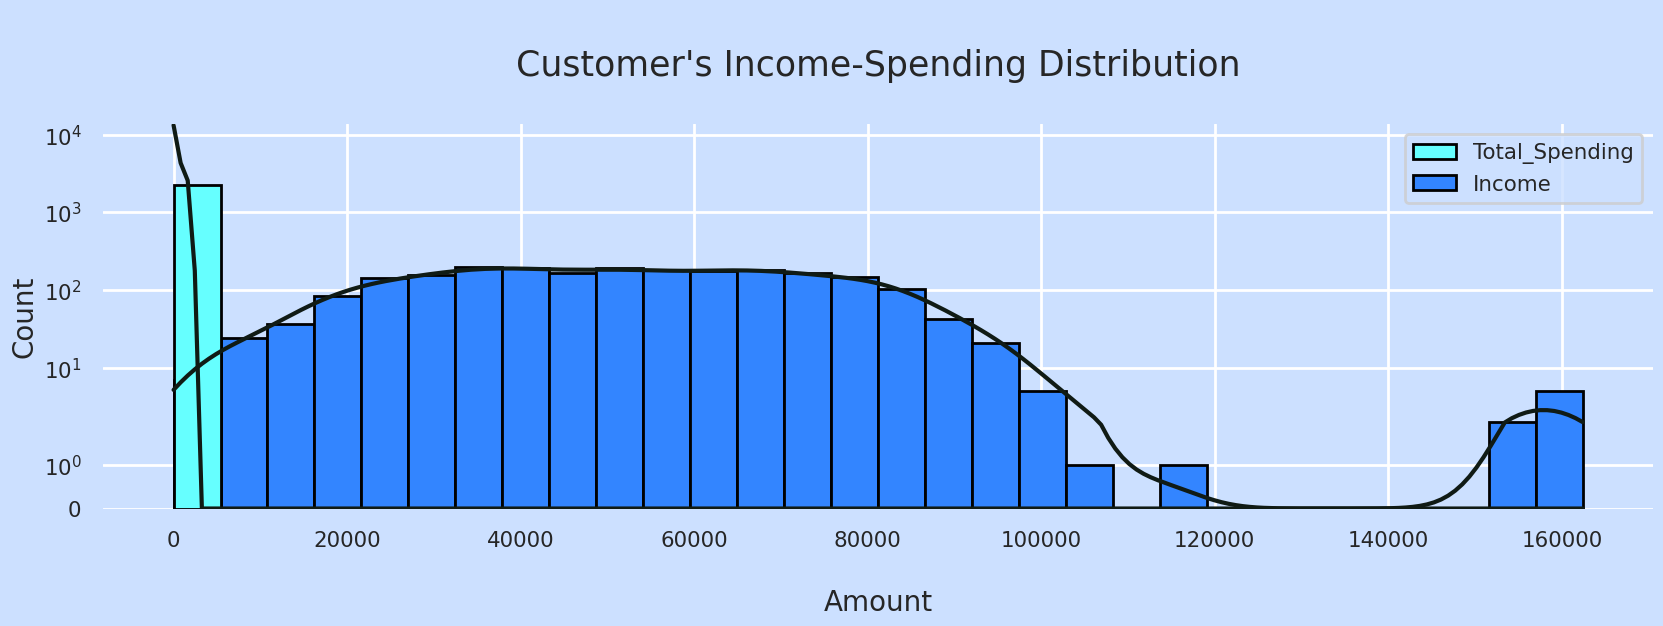

In [37]:
df = df[df["Income"] < 600000]

#now, let's plot again
print(f"Let's have a look again on the distribution of customer's income and spending :")
plt.subplots(figsize=(20, 5))
p = sns.histplot(df[["Total_Spending","Income"]],palette=["#66ffff","#3385ff"],kde=True,bins=30,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.lines[1].set_color("#101B15")
p.axes.set_yscale("symlog")
p.axes.set_title("\nCustomer's Income-Spending Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAmount",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

Insights:

Most of the customers income range is in between 20000 to 80000
Bust almost all customers spend very few portion of their income.

Customer's Education Level plot

Let's have a look on the customer's education :


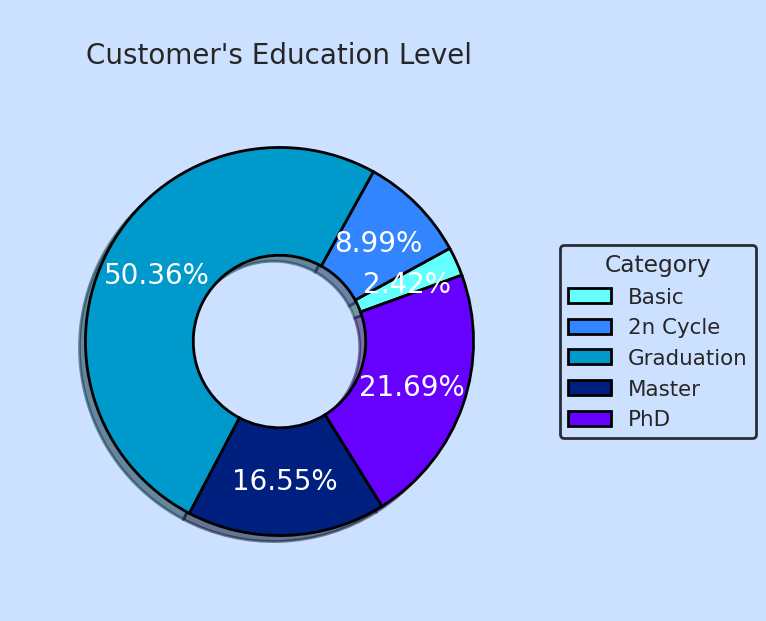

In [ ]:
print(f"Let's have a look on the customer's education :")
plt.subplots(figsize=(7, 7))

labels = "Basic","2n Cycle", "Graduation", "Master", "PhD"
size = 0.5

wedges, texts, autotexts = plt.pie([df["Education"].value_counts()[0],
                                    df["Education"].value_counts()[1],
                                    df["Education"].value_counts()[2],
                                    df["Education"].value_counts()[3],
                                    df["Education"].value_counts()[4]],
                                    explode = (0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = ["#66ffff","#3385ff","#0099cc","#002080","#6600ff"],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 2),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCustomer's Education Level",fontsize=20)
plt.show()

Insights:

Customers have three education levels : Basic, 2n Cycle, Graduation, Master, PhD
50.41% have completed graduation, 16.50% are doing masters, 21.70% are persuing PhD, 8.95% are in 2n Cycle study and 2.44% have done basic education

## Education Level-wise Spending Distribution

Let's have a look on the distribution of customer's income and spending on basis of education level :


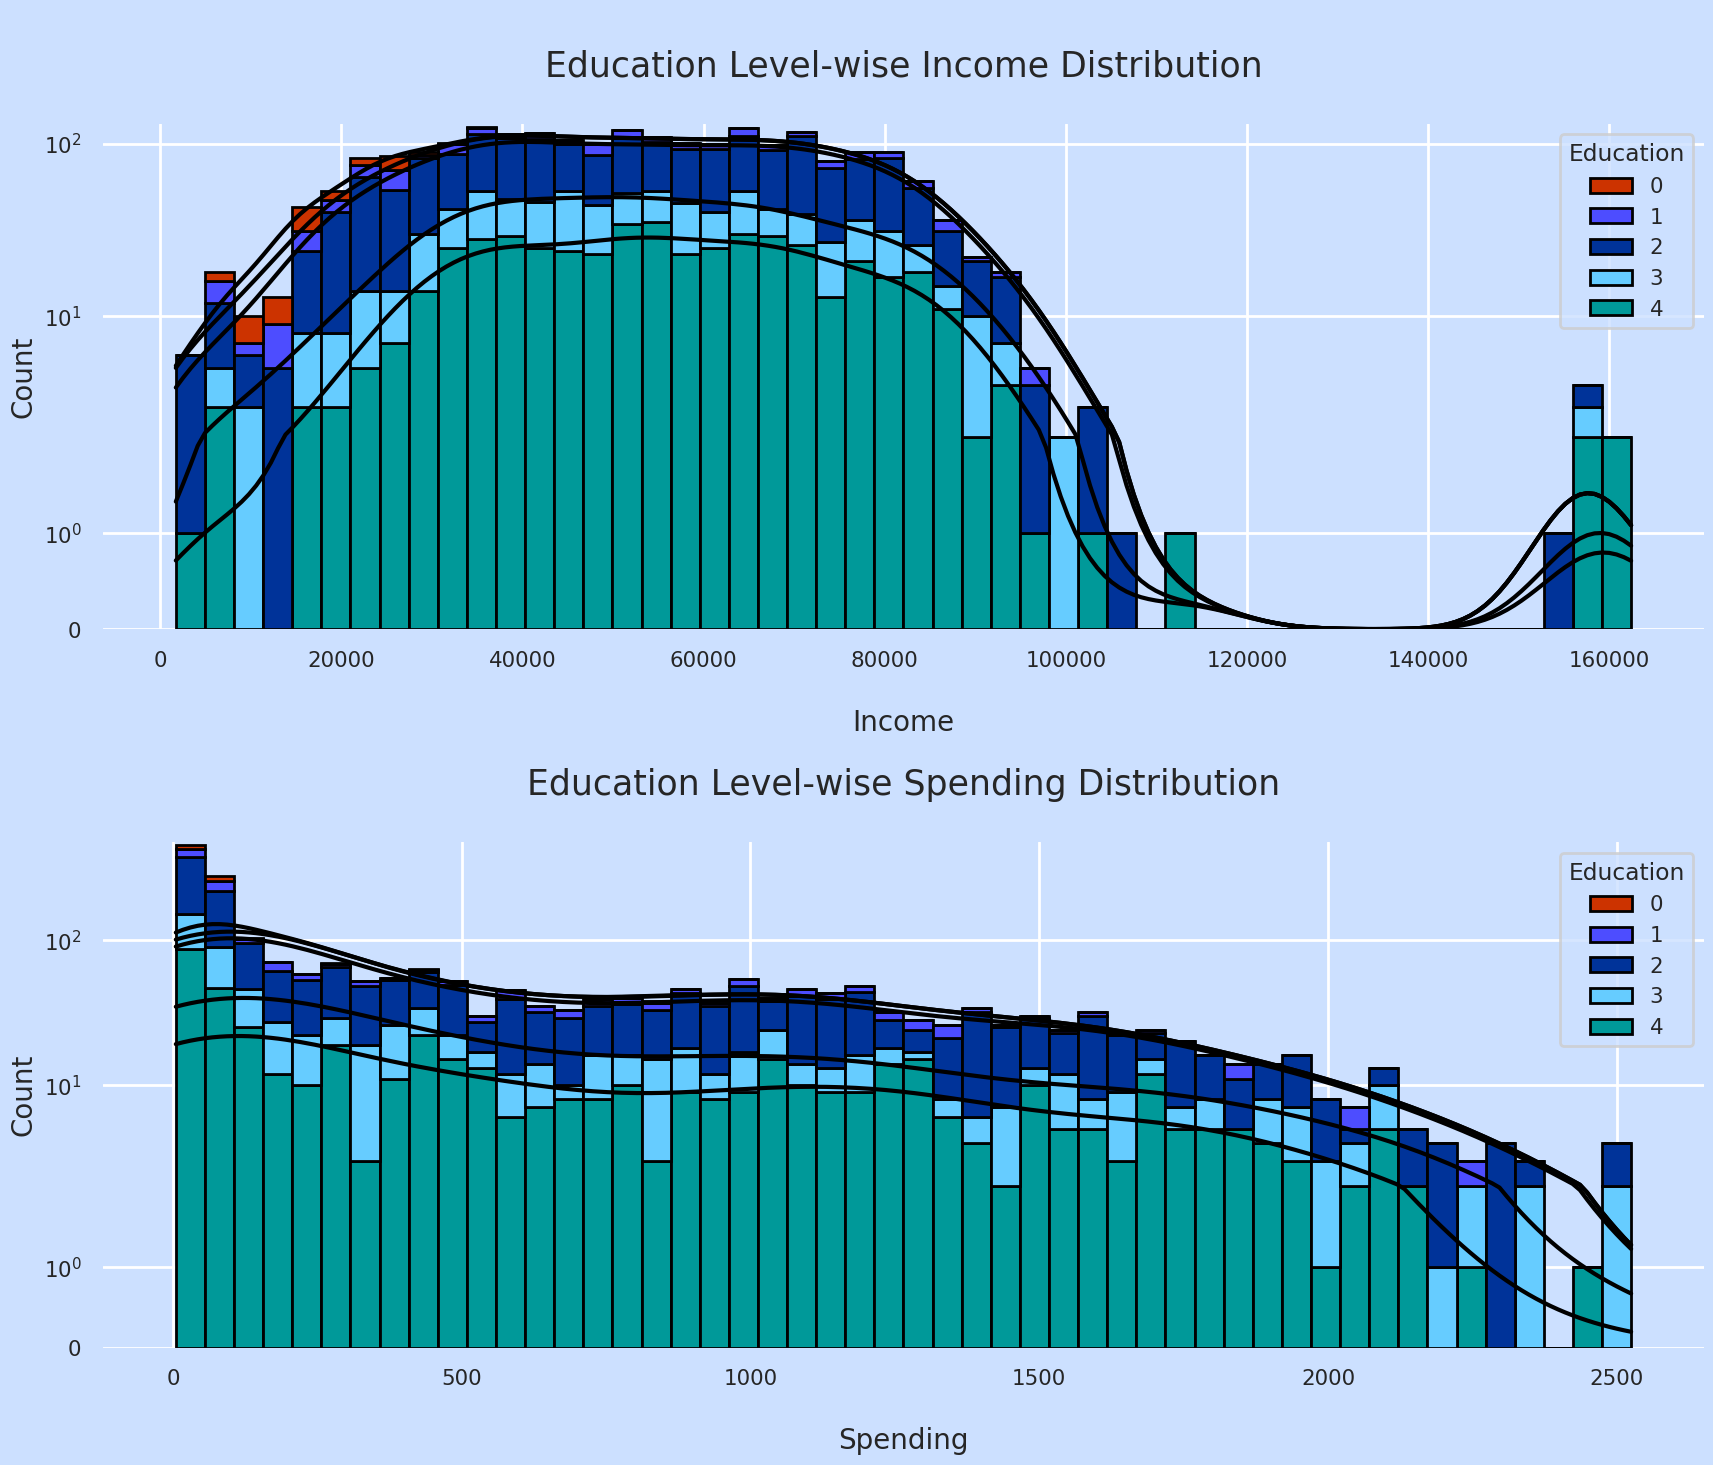

In [38]:
print(f"Let's have a look on the distribution of customer's income and spending on basis of education level :")

_, axes = plt.subplots(2,1,figsize=(20,16),sharex=False)
plt.tight_layout(pad=7.0)

colors = ["#cc2900","#0000ff","#66ffff", "#009999","#99ff66"]
colors2 = ["#cc3300","#4d4dff","#003399","#66ccff","#009999"]
sns.histplot(data=df,x="Income",hue="Education",multiple="stack",palette=colors2,ax=axes[0],kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
axes[0].lines[0].set_color("000000")
axes[0].lines[1].set_color("000000")
axes[0].lines[2].set_color("000000")
axes[0].lines[3].set_color("000000")
axes[0].lines[4].set_color("000000")

axes[0].set_yscale("symlog")
axes[0].set_title("\nEducation Level-wise Income Distribution\n",fontsize=25)
axes[0].set_ylabel("Count",fontsize=20)
axes[0].set_xlabel("\nIncome",fontsize=20)

sns.histplot(data=df,x="Total_Spending",hue="Education",multiple="stack",palette=colors2,ax=axes[1],kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
axes[1].lines[0].set_color("000000")
axes[1].lines[1].set_color("000000")
axes[1].lines[2].set_color("000000")
axes[1].lines[3].set_color("000000")
axes[1].lines[4].set_color("000000")
axes[1].set_yscale("symlog")
axes[1].set_title("\nEducation Level-wise Spending Distribution\n",fontsize=25)
axes[1].set_ylabel("Count",fontsize=20)
axes[1].set_xlabel("\nSpending",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

Insights:

Most of the undergraduate level customer's income range is in between 10000 to 80000 and spending in between 0 to 1400.
Most of the graduate level customer's income range is in between 20000 to 85000 and spending in between 0 to 2000.
Most of the postgraduate level customer's income range is in between 30000 to 80000 and spending in between 0 to 2000.

Let's have a look on the distribution of customer's children :


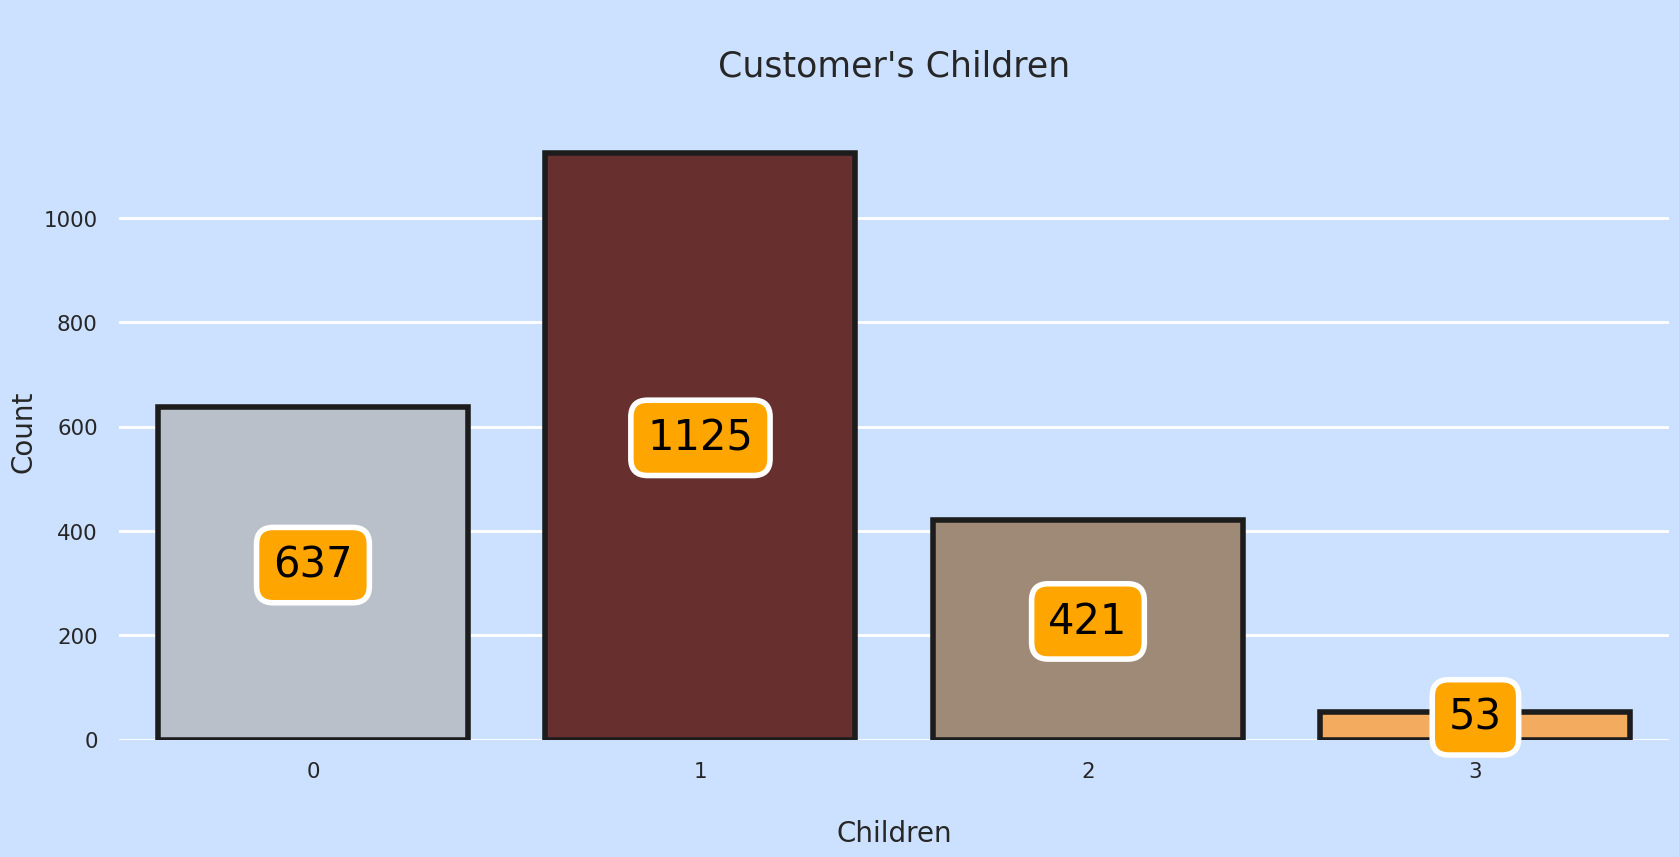

In [39]:
print(f"Let's have a look on the distribution of customer's children :")
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=df["Children"],palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Children\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nChildren",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Report:

632 customers have no child.
Most of the customers have one child.
416 customers have two child.
50 customers have three child.

Final report
We have seen that this dataset has outliers in Wines, Fruits, Meat, Fish, Sweets, Gold, Age, Total_Spending columns and multicollinearity in Total_Spending,Wines,Fruits,Meat,Fish,Sweets,Gold columns. So we have to handle those in feature engineering steps.

We have dropped the ID column as it is not going to participate in any model building task

The column Z_CostContact, Z_Revenue does have constant values. As this columns does not have any varience, we have dropped this column

There are some columns which individually does not have such meaning, so in feature engineering we'll retrieve new columns.

In [40]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 0


In [41]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 10


In [42]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 11


In [43]:
continuous_features

['Age',
 'Income',
 'Total_Spending',
 'Days_as_Customer',
 'Recency',
 'Wines',
 'Fruits',
 'Meat',
 'Fish',
 'Sweets',
 'Gold']

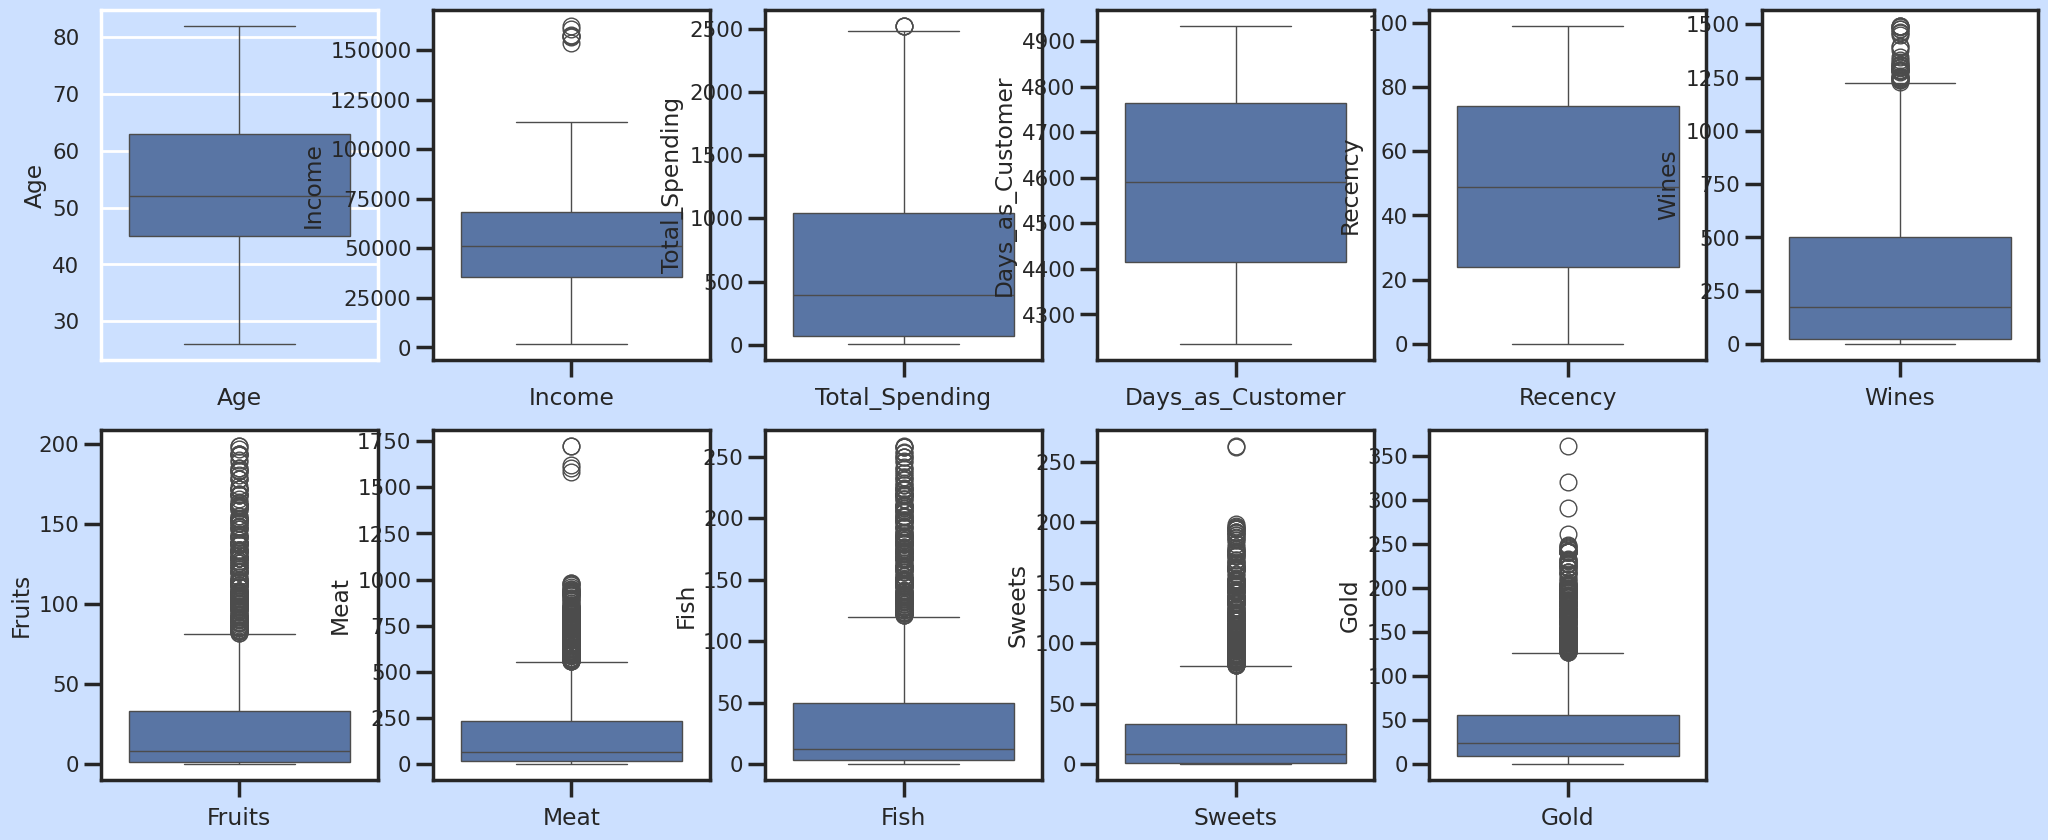

In [44]:
cont_features = continuous_features.copy()
plt.figure(figsize=(25, 10))

for i in range(len(cont_features)):
        plt.subplot(2,6,i+1)
        sns.set_style('ticks')
        plt.xlabel(cont_features[i])
        ax = sns.boxplot(df[cont_features[i]])

report

We can see, there are no such outliers in Recency and Days_as_Customer Column
But there are outliers in following columns -
Income
Wines
Fruits
Meat
Fish
Sweets
Gold
Age
Total Spending

Detecting Outlier and Capping it

In [45]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit
    return df

for col in continuous_features:
         detect_outliers(col)

Checking Skewness after Outlier Capping

In [46]:
df[continuous_features].skew(axis=0, skipna=True)

,0
Age,0.092495
Income,0.350773
Total_Spending,0.860174
Days_as_Customer,-0.016397
Recency,-0.004299
Wines,1.176036
Fruits,2.104241
Meat,2.085282
Fish,1.919970
Sweets,2.135674


In [47]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
outlier_features = ["Wines","Fruits","Meat","Fish","Sweets","Gold","Age","Total_Spending"] #we can find the columns which has oitliers in the EDA
numeric_features = [x for x in numeric_features if x not in outlier_features]

In [48]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline




dataC = df.copy()

numeric_pipeline = Pipeline(steps=
                            [("Imputer", SimpleImputer(strategy='constant', fill_value=0)),
                             ("StandardScaler", StandardScaler())]
                           )

outlier_features_pipeline = Pipeline(steps=
                                     [("Imputer", SimpleImputer(strategy='constant', fill_value=0)),
                                      ("transformer", PowerTransformer(standardize=True))]
                                    )

preprocessor = ColumnTransformer(
    [
        ("numeric pipeline",numeric_pipeline, numeric_features),
        ("Outliers Features Pipeline", outlier_features_pipeline, outlier_features)
    ]
)

columns = dataC.columns
dataC = preprocessor.fit_transform(dataC)
scaled_data = pd.DataFrame(dataC, columns= columns )
print("After scaling, let's have a glimpse of the scaled dataset :")
scaled_data.head()

After scaling, let's have a glimpse of the scaled dataset :


,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
0,-0.459490,-1.347635,-1.584362,-1.264308,0.288947,1.529793,0.306856,1.407639,2.509801,-0.552429,0.348738,-0.438933,0.692865,1.058011,1.409686,1.420252,1.603700,1.387832,1.090527,1.014227,1.315785
1,-0.459490,-1.347635,0.631169,1.395139,-0.262003,-1.191143,-0.383971,-1.110921,-0.568970,-1.167738,-0.168700,-0.438933,-0.131421,-1.212159,-0.985311,-1.378336,-0.870349,-0.971157,-0.938568,1.251896,-1.442462
2,-0.459490,0.742041,-1.584362,-1.264308,0.918423,-0.206659,-0.798467,1.407639,-0.226884,1.293496,-0.686137,-0.438933,-0.543564,0.745578,1.064234,0.445709,1.329530,0.552570,0.448706,0.362806,0.660253
3,-0.459490,0.742041,0.631169,0.065416,-1.182183,-1.062517,-0.798467,-0.751127,-0.911056,-0.552429,-0.168700,-0.438933,0.280722,-1.212159,-0.380323,-0.707871,-0.097459,-0.518536,-1.043656,-1.314834,-1.118746
4,1.533563,0.742041,0.631169,0.065416,0.296187,-0.953679,1.550344,0.328256,0.115201,0.062879,1.383614,-0.438933,-0.131421,0.122520,0.986785,0.397927,0.788455,0.699398,-0.342328,-1.034962,0.177763
